<a href="https://colab.research.google.com/github/witchertech/Firestore/blob/master/MusicGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


# Load dataset
df = pd.read_csv('music_genre.csv')
df.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
pip install holoviews matplotlib pandas numpy


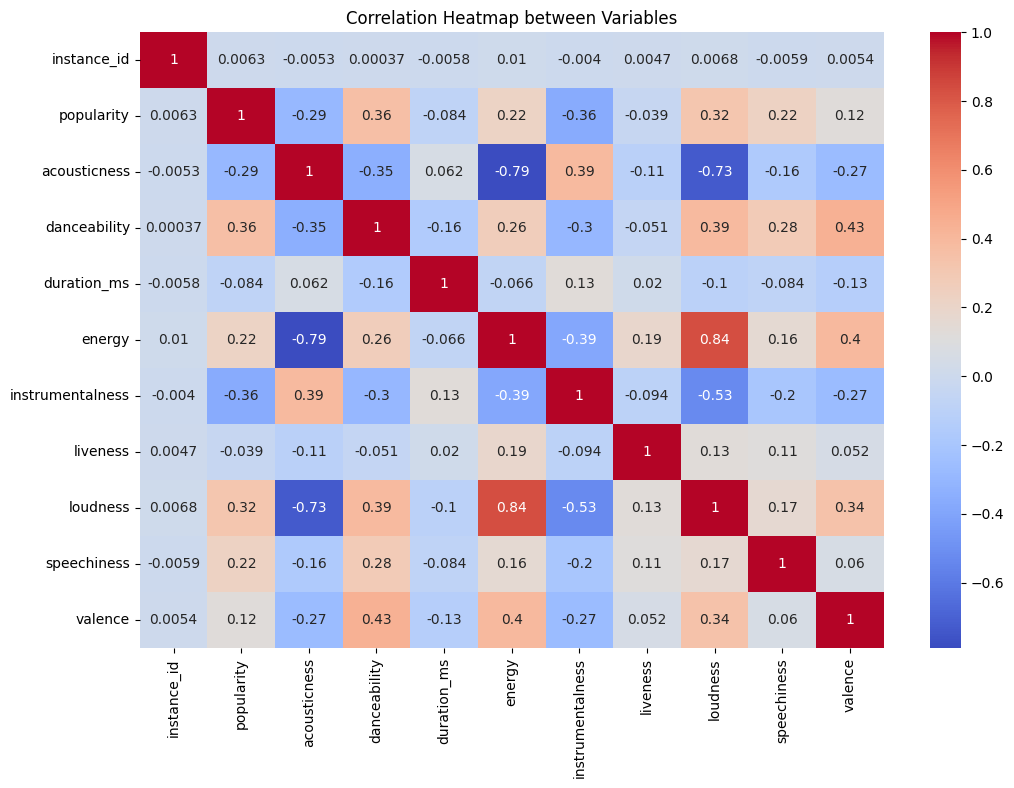

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()


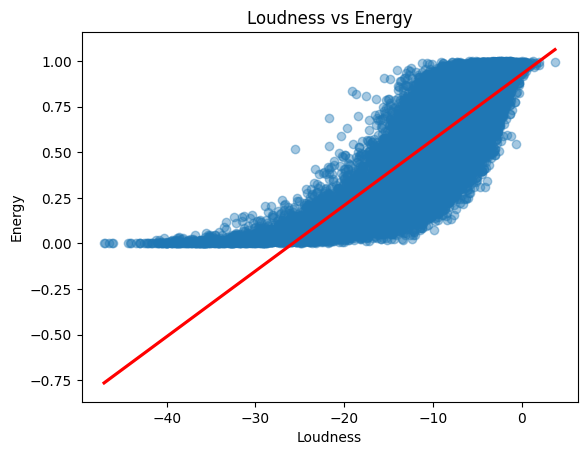

In [ ]:
sns.regplot(data=df, x='loudness', y='energy', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Loudness vs Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()



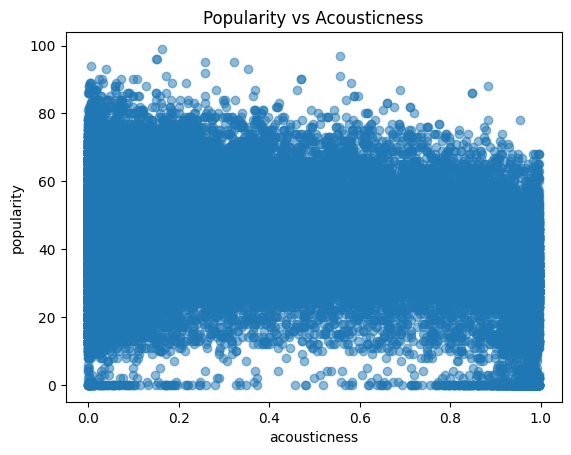

In [ ]:
sns.regplot(data=df, x='acousticness', y='popularity', scatter_kws={'alpha':0.5})
plt.title('Popularity vs Acousticness')
plt.show()


<ipython-input-6-8dc0b6f39cf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='music_genre', order=df['music_genre'].value_counts().index, palette='viridis')


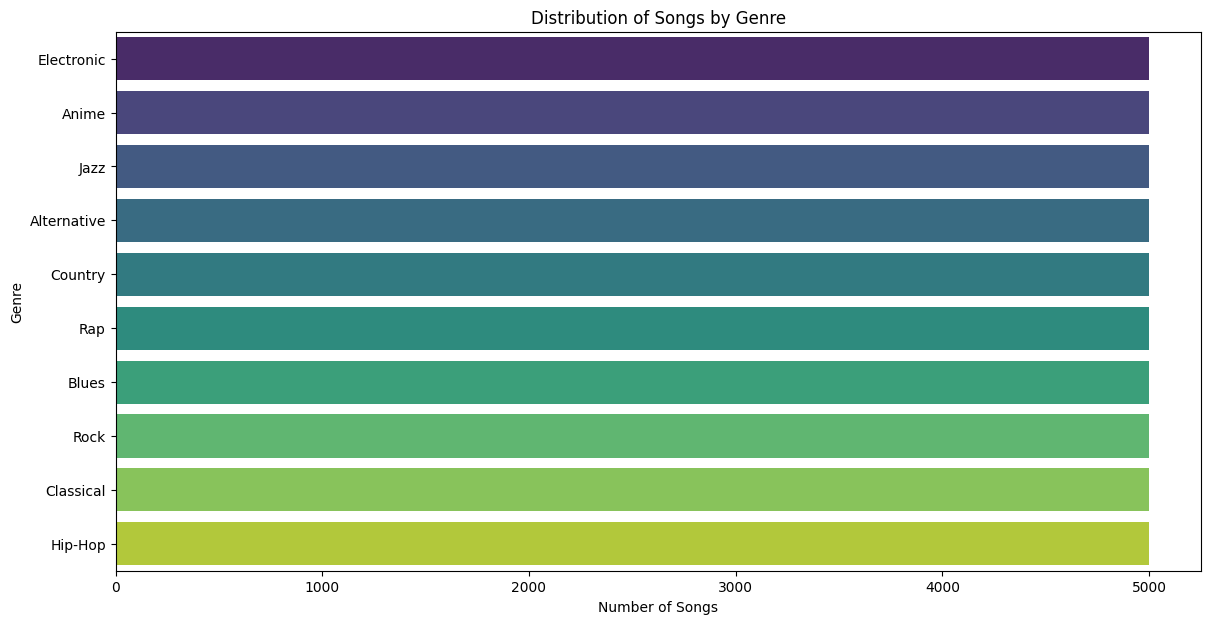

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, y='music_genre', order=df['music_genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Songs by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()


In [ ]:
genre_popularity = df.groupby('music_genre')['popularity'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(genre_popularity, x='music_genre', y='popularity',
             title="Average Popularity by Genre",
             labels={'music_genre':'Genre','popularity':'Average Popularity'},
             color='popularity',
             color_continuous_scale='Blues')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
genre_duration = df.groupby('music_genre')['duration_ms'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(genre_duration, x='music_genre', y='duration_ms',
             title="Average Song Duration by Genre",
             labels={'music_genre':'Genre','duration_ms':'Average Duration (ms)'},
             color='duration_ms',
             color_continuous_scale='Greens')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


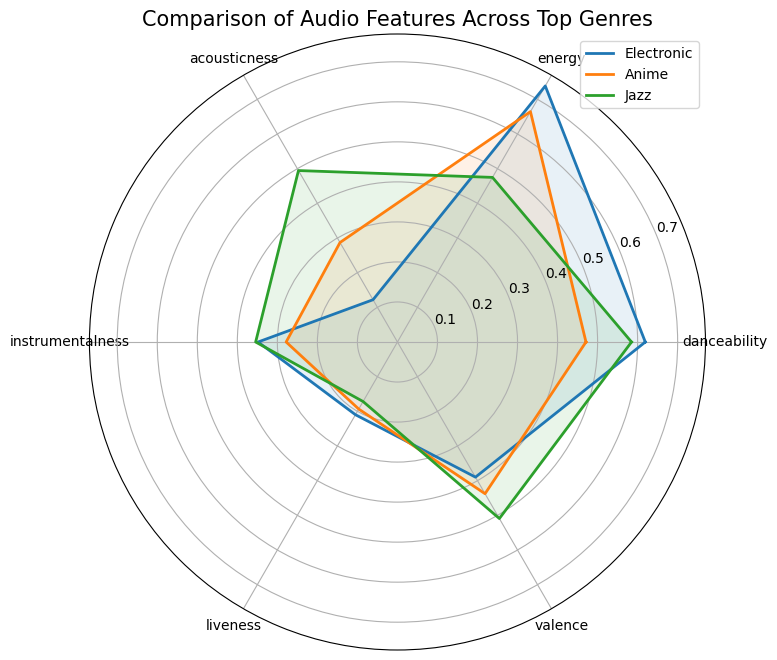

In [ ]:
from math import pi

# Select top 3 genres for clear visualization:
top_3_genres = df['music_genre'].value_counts().head(3).index.tolist()

# Features to compare:
features = ['danceability','energy','acousticness','instrumentalness','liveness','valence']

# Radar chart setup:
angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

for genre in top_3_genres:
    values = df[df['music_genre']==genre][features].mean().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=genre)
    ax.fill(angles, values, alpha=0.1)

# Add feature labels:
plt.xticks(angles[:-1], features)
ax.set_title("Comparison of Audio Features Across Top Genres", size=15)
ax.legend(loc='upper right')

plt.show()


   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.2

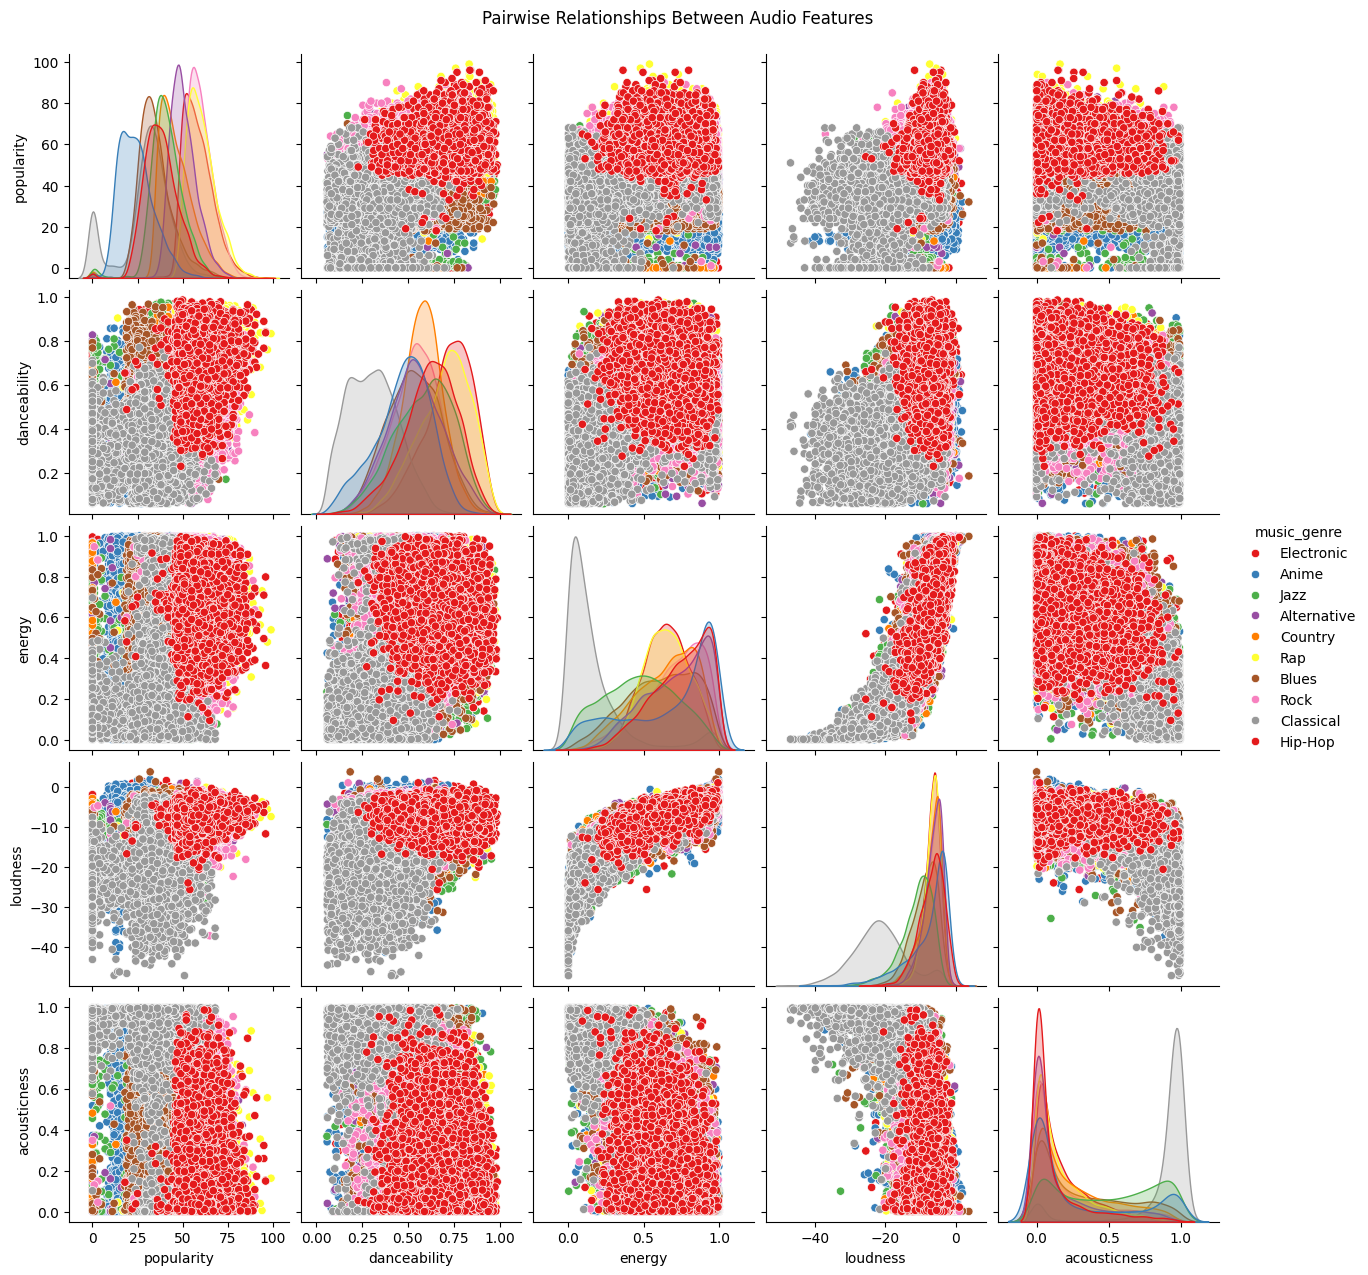

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/music_genre.csv')

# Check the structure of your DataFrame to ensure columns exist
print(df.head())

# Selected features for the pairplot
selected_features = ['popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'tempo']

# Create the pairplot
sns.pairplot(df[selected_features + ['music_genre']], hue='music_genre', palette='Set1')
plt.suptitle("Pairwise Relationships Between Audio Features", y=1.02)
plt.show()


In [ ]:
# Scatterplot: Artist vs Track Popularity
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='artist_name', y='track_name', hue='popularity', palette='viridis', size='popularity', sizes=(20, 200), alpha=0.7)
plt.title('Relationship Among Artist, Track, and Popularity')
plt.xlabel('Artist Name')
plt.ylabel('Track Name')
plt.legend(title='Track Popularity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-15-098bf1812525>:11: UserWarning: Glyph 20919 (\N{CJK UNIFIED IDEOGRAPH-51B7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-098bf1812525>:11: UserWarning: Glyph 28843 (\N{CJK UNIFIED IDEOGRAPH-70AB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-098bf1812525>:11: UserWarning: Glyph 24561 (\N{CJK UNIFIED IDEOGRAPH-5FF1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-098bf1812525>:11: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-098bf1812525>:11: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-098bf1812525>:11: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-098bf1812525>:11: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_

ValueError: 
Joey Bada$$
         ^
ParseException: Expected end of text, found '$'  (at char 9), (line:1, col:10)

Error in callback <function _draw_all_if_interactive at 0x7963e758d6c0> (for post_execute):


ValueError: 
P*$$YRICH
  ^
ParseException: Expected end of text, found '$'  (at char 2), (line:1, col:3)

ValueError: 
P*$$YRICH
  ^
ParseException: Expected end of text, found '$'  (at char 2), (line:1, col:3)

<Figure size 1400x800 with 1 Axes>

In [ ]:
numeric_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                'energy', 'instrumentalness', 'key', 'liveness',
                'loudness', 'speechiness', 'tempo', 'valence']

non_numeric_columns = {}
for col in numeric_cols:
    try:
        df[col].astype(float)
    except ValueError:
        non_numeric_columns[col] = df[col].unique()

print(non_numeric_columns)


{'key': array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#',
       nan], dtype=object), 'tempo': array(['100.889', '115.00200000000001', '127.994', ..., '112.97',
       '167.655', '99.20100000000001'], dtype=object)}


In [ ]:
print(df['key'].unique())
print(df['key'].dtype)


['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
object


In [ ]:
# Map musical keys to integers
key_mapping = {
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5,
    'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11
}

df['key'] = df['key'].map(key_mapping)


In [ ]:
numeric_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                'energy', 'instrumentalness', 'key', 'liveness',
                'loudness', 'speechiness', 'tempo', 'valence']

print(df[numeric_cols].dtypes)


popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
speechiness         float64
tempo                object
valence             float64
dtype: object


In [ ]:
import numpy as np

# Replace invalid values with NaN
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  float64
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6